In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

In [ ]:
# Import some modules from ase and Nanoparticle Library
from ase.visualize import view
from Core import Nanoparticle as NP
from Core.Adsorption import PlaceAddAtoms

In [222]:
p = NP.Nanoparticle()
p.truncated_octahedron(10,1,{'Ag':1})
p.construct_adsorption_list()
n_sites = p.get_total_number_of_sites()
print('Your structure has {} adsorption sites'.format(n_sites))

Resulting stoichiometry: {'Ag': 664}
Your structure has 1892 adsorption sites


In [ ]:
len(p.get_atom_indices_from_coordination_number([7]))

In [223]:
p = NP.Nanoparticle()
p.truncated_octahedron(10,1,{'Ag':1})
p.construct_adsorption_list()
# Place Add atoms
ads_site_list = p.get_adsorption_list()
#on_top = [list(x) for x in ads_site_list if len(x) == 1]
ads_placer = PlaceAddAtoms(p.get_all_symbols())
ads_placer.bind_particle(p)
for f in range(0, 1892):
    p_with_adsorbates = ads_placer.place_add_atom(p, 'O', [list(ads_site_list.list[f])])
    
view(p_with_adsorbates.get_ase_atoms())

Resulting stoichiometry: {'Ag': 664}


In [216]:
p.get_atom_indices_from_coordination_number([4,6])

[0, 31, 48, 65, 90, 145]

<ipython-input-206-cf11689ee016>:7: RuntimeWarning: divide by zero encountered in double_scalars
  plt.scatter(f, 1/f)


Text(0, 0.5, 'correction')

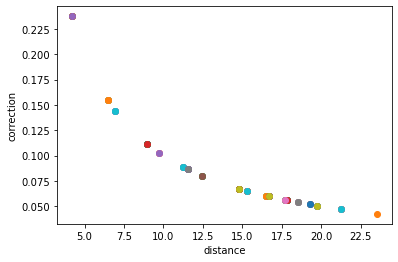

In [206]:
import matplotlib.pyplot as plt
atoms = p_with_adsorbates.get_ase_atoms()
D = atoms.get_all_distances()[146:]
Di = np.array([row[146:] for row in D])

for f in Di[0]:
    plt.scatter(f, 1/f)
plt.xlabel('distance')
plt.ylabel('correction')

In [173]:
for atom in p_with_adsorbates.get_atom_indices_from_coordination_number([7]):
    p.get_atoms(atom).symbol = 'Au'
    
view(p_with_adsorbates.get_ase_atoms())

In [ ]:
from Core import MathModules as math
positions = []
for edge in p.get_atom_indices_from_coordination_number([7]):
    positions = [p.get_position(edge)]
    for neighbor in p.get_coordination_atoms(edge):
        if p.get_coordination_number(neighbor) == 7:
            positions.append(p.get_position(neighbor))
            print(math.get_bridge_perpendicular_line(positions, p.atoms.atoms.get_center_of_mass())  )    
            break
    else:
        print('no tiene')      

In [ ]:
import itertools 
import numpy as np

p = NP.Nanoparticle()
p.truncated_octahedron(6,0,{'Ag':1})

for atom in p.get_atom_indices_from_coordination_number(range(12)):
    for surface in [[1,0,0], [-1,0,0], [0,1,0], [0,-1,0], [0,0,1], [0,0,1]]:
        mi_vec = surface / np.linalg.norm(surface)
        pos_vec = p.get_position(atom)/ np.linalg.norm(p.get_position(atom))
        if np.dot(mi_vec, pos_vec) > 0.99:
            p.get_atoms(atom).symbol = 'Au'
view(p.get_ase_atoms())        

In [ ]:
planes = [plane for plane in itertools.product([1,-1],3)]
planes

In [ ]:
import itertools

planes = [plane for plane in itertools.combinations_with_replacement([1,-1],3) if plane != (0,0,0)]
for f in itertools.combinations_with_replacement([-1,1],3):
    if f not in planes:
        planes.append(f)
        
planes

In [ ]:
import copy

def find_atom_plane_vec(particle, atom_idx):
    normal_vector = 0
    pos_vec = particle.get_position(atom_idx)/ np.linalg.norm(particle.get_position(atom_idx))
    planes = [plane for plane in itertools.combinations_with_replacement([1,-1,0],3) if plane != (0,0,0)]
    for plane in planes:
        mi_vec = plane / np.linalg.norm(plane)
        dot_prod = np.dot(mi_vec, pos_vec)
        if dot_prod > normal_vector:
            normal_vector = dot_prod
            direction = copy.copy(mi_vec)
    return direction
        

In [ ]:
for atom in p.get_atom_indices_from_coordination_number(range(12)):
    print(find_atom_plane_vec(p, atom))

In [ ]:
[0,0,0] / np.linalg.norm([0,0,0])